In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
pd.set_option('display.max_columns',None)



from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(15,5)
%config InlineBackend.figure_format = 'png'
%matplotlib inline

Загружаем данные в датафреймы 

In [2]:
df_checks_with_cat = pd.read_pickle("./df_checks_with_cat.pkl")


In [3]:
df_shops = pd.read_pickle("./df_shops.pkl")


In [4]:
df_checks_with_cat.head()

,CheckUID,id_tt_cl,id_tov_cl,Quantity,week,BaseSum,hour,name_gr,name_gr2
0,32C04617-1DA6-EC11-9064-005056A7A8DF,16061,25528,1.0,11,422.73,20,Овощи. Фрукты. Грибы. Зелень,Авокадо
1,7CC04B95-79AA-EC11-9064-005056A7A8DF,11846,1609,2.0,12,67.62,10,Молочная Продукция,Лакомства молочные
2,7BC04CF0-8AA6-EC11-9064-005056A7A8DF,11160,49220,1.0,11,124.17,10,Пространство ВкусВилл,Продажа услуг
3,75C04F15-4C9A-EC11-9064-005056A7A8DF,14258,55220,1.0,9,69.09,19,Молочная Продукция,Йогурты питьевые
4,54C0631E-D2AD-EC11-9064-005056A7A8DF,12853,32931,1.0,12,49.09,16,Хлеб,Хлеб на закваске


Строим пивот таблицу по группам

In [5]:
df_category_pivot_sum = df_checks_with_cat.pivot_table(columns=['name_gr'],index=['id_tt_cl'],values = ['BaseSum'],aggfunc= 'sum',fill_value=0).reset_index()


Исправляем кривое форматирование пивот таблицы

In [6]:

df_category_pivot_sum = pd.concat([df_category_pivot_sum['id_tt_cl'].to_frame(),df_category_pivot_sum.loc[:,'BaseSum']], axis=1)

Добавляем по каждому магазину сумму проданных итемов -- df_category_pivot_sum

In [7]:
df_category_pivot_sum['overal_sum'] = df_category_pivot_sum.drop('id_tt_cl',axis=1).sum(axis=1)

Добавляем по каждому магазину количество проданных итемов в процентах по каждой категории -- df_category_pivot_sum3

In [8]:
df_category_pivot_sum3 = df_category_pivot_sum.copy()

In [9]:
for column in df_category_pivot_sum3.drop(['id_tt_cl','overal_sum'],axis=1):
    df_category_pivot_sum3[column] = df_category_pivot_sum3[column].div(df_category_pivot_sum3['overal_sum']/100)

In [10]:
del df_category_pivot_sum3['overal_sum']

In [11]:
df_category_pivot_sum3.head()

,id_tt_cl,Айс ВкусВилл,Алкоголь,Архив,Бакалея,Бытовая Химия,ВВ Праздник,Выбор покупателя,Гастрополка,ДаркКитчен,Детские товары,Детское питание,Довериум,Замороженные десерты,Замороженные продукты,Интернет-магазин,Кафе,Консервация,Косметика,Кулинария,Кулинарный конструктор,Личная гигиена и уход,Медицинские товары,Микромаркет,Мировые бренды,Молочная Продукция,Мясная Витрина ВВ,Мясные деликатесы. Колбасы,Мясо. Птица. П/ф охл. Яйца,Напитки,Овощи. Фрукты. Грибы. Зелень,Отдел без упаковки,Пекарня,Подписки на товары и услуги,Проекты нон-фуд,Пространство ВкусВилл,Прочее,Рационы,Региональная полка,Рестораны,Рыба. Морепродукты,Рыбная витрина,"Сладости, кондитерские изделия","Сухофрукты. Сушеные овощи, грибы, ягоды. Орехи",Сыры,Товары для Еком контрагентов,Товары для дома,Товары для животных,"Торты, пирожные, десерты",ФС Общепит,Фрешбар,Хлеб,Чай и кофе. Проекты,Электронная Коммерция
0,10778,0.028530,1.486025,0.319336,3.968807,0.215023,0.000000,0.0,0.0,0.0,0.430221,0.428567,0.0,1.437878,2.164578,0.0,0.003287,1.675644,0.428854,12.514321,0.0,0.656141,0.194468,0.000000,0.062820,16.509170,0.0,4.002875,9.902033,3.439055,14.355519,0.001469,0.000000,0.069973,0.000000,0.000000,0.039060,0.0,0.000000,0.000000,4.450691,0.0,5.601831,0.884136,4.090892,0.000000,0.776814,0.323632,4.885754,0.000516,0.0,4.652083,0.0,0.000000
1,10780,0.052277,1.206211,0.156387,3.811334,0.207037,0.002084,0.0,0.0,0.0,0.345773,0.496369,0.0,1.850412,2.241368,0.0,0.000629,1.589270,0.409531,14.576149,0.0,0.875650,0.215607,0.000000,0.028715,13.448881,0.0,4.095413,8.403912,4.615492,15.567521,0.001758,0.000112,0.105344,0.000307,0.146729,0.000000,0.0,0.000000,0.000000,5.092997,0.0,5.426730,1.554323,4.068802,0.000000,0.684331,0.305631,4.012927,0.000000,0.0,4.403894,0.0,0.000092
2,10786,0.045723,1.662146,0.145489,4.038547,0.206756,0.001729,0.0,0.0,0.0,0.369094,0.390184,0.0,1.497813,2.329800,0.0,0.000603,1.654847,0.427763,15.669101,0.0,0.631231,0.255811,0.000000,0.044507,12.526597,0.0,3.839087,6.883273,4.700160,16.062043,0.419034,0.000061,0.046832,0.049789,0.338962,0.013474,0.0,0.002412,0.000000,5.239113,0.0,5.409007,1.495133,4.254611,0.019733,0.644248,0.161773,4.115132,0.000000,0.0,4.408384,0.0,0.000000
3,10864,0.037661,1.158582,0.173997,3.808843,0.202123,0.000000,0.0,0.0,0.0,0.234820,0.257582,0.0,1.830352,1.738153,0.0,0.000556,1.745209,0.611267,16.379349,0.0,0.991596,0.270294,0.000000,0.083105,12.796482,0.0,3.656328,7.570962,3.637107,15.502389,0.000000,0.000100,0.026539,0.000004,0.000000,0.000000,0.0,0.000000,0.000000,4.701129,0.0,6.253492,1.448371,3.773113,0.000000,0.759254,0.276481,5.090483,0.000000,0.0,4.984277,0.0,0.000000
4,10904,0.055949,1.735003,0.151696,3.565034,0.202205,0.000000,0.0,0.0,0.0,0.450815,0.455478,0.0,1.184544,2.213660,0.0,0.000000,1.665958,0.379071,15.216444,0.0,0.439854,0.199905,0.000278,0.038293,14.057314,0.0,3.880168,7.608264,4.210884,17.044059,0.000253,0.000000,0.050712,0.115730,0.411423,0.000000,0.0,0.000000,0.001532,5.446382,0.0,4.912796,1.178186,4.186665,0.000000,0.536263,0.356255,4.344700,0.000000,0.0,3.704228,0.0,0.000000


In [31]:
df_shops.columns

Index(['adress', 'Hours', 'Shirota', 'Dolgota', 'ploshad', 'Район', 'shtat',
       'qty_kassa', 'qty_kassa_so', 'format', 'Region', 'Start_date', 'size',
       'quality'],
      dtype='object')

Выбираем хорошие и плохие магазины 

In [17]:
df_average_L =  df_shops.loc[df_shops['quality'] == 30].index.tolist()
df_bad_L =  df_shops.loc[df_shops['quality'] == -3].index.tolist()
df_good_L = df_shops.loc[df_shops['quality'] == 3].index.tolist()
df_average_M =  df_shops.loc[df_shops['quality'] == 20].index.tolist()
df_bad_M =  df_shops.loc[df_shops['quality'] == -2].index.tolist()
df_good_M = df_shops.loc[df_shops['quality'] == 2].index.tolist()
df_average_S =  df_shops.loc[df_shops['quality'] == 10].index.tolist()
df_bad_S =  df_shops.loc[df_shops['quality'] == -1].index.tolist()
df_good_S = df_shops.loc[df_shops['quality'] == 1].index.tolist()
df_average =  df_shops.loc[(df_shops['quality'] == 30) | (df_shops['quality'] == 20) | (df_shops['quality'] == 10) ].index.tolist()
df_bad =  df_shops.loc[(df_shops['quality'] == -3) | (df_shops['quality'] == -2) | (df_shops['quality'] == -1) ].index.tolist()
df_good = df_shops.loc[(df_shops['quality'] == 3) | (df_shops['quality'] == 2) | (df_shops['quality'] == 1) ].index.tolist()

In [18]:
len(df_good)

60

In [34]:
df_category_good_L = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_good_L)].mean(axis=0).to_frame(name="good")
df_category_bad_L = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_bad_L)].mean(axis=0).to_frame(name="bad")
df_category_average_L = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_average_L)].mean(axis=0).to_frame(name="average")
df_category_good_M = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_good_M)].mean(axis=0).to_frame(name="good")
df_category_bad_M = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_bad_M)].mean(axis=0).to_frame(name="bad")
df_category_average_M = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_average_M)].mean(axis=0).to_frame(name="average")
df_category_good_S = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_good_S)].mean(axis=0).to_frame(name="good")
df_category_bad_S = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_bad_S)].mean(axis=0).to_frame(name="bad")
df_category_average_S = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_average_S)].mean(axis=0).to_frame(name="average")
df_category_good = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_good)].mean(axis=0).to_frame(name="good")
df_category_bad = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_bad)].mean(axis=0).to_frame(name="bad")
df_category_average = df_category_pivot_sum3.loc[df_category_pivot_sum3['id_tt_cl'].isin(df_average)].mean(axis=0).to_frame(name="average")


Строим итогову табличку по процентам продаж категорий в зависимости размера магазина

In [35]:


df_category_diff_L =  pd.concat([df_category_good_L,df_category_average_L, df_category_bad_L], ignore_index=False, axis=1).drop(index='id_tt_cl')
df_category_diff_M =  pd.concat([df_category_good_M,df_category_average_M, df_category_bad_M], ignore_index=False, axis=1).drop(index='id_tt_cl')
df_category_diff_S =  pd.concat([df_category_good_S,df_category_average_S, df_category_bad_S], ignore_index=False, axis=1).drop(index='id_tt_cl')
df_category_diff =  pd.concat([df_category_good,df_category_average, df_category_bad], ignore_index=False, axis=1).drop(index='id_tt_cl')

<AxesSubplot:>

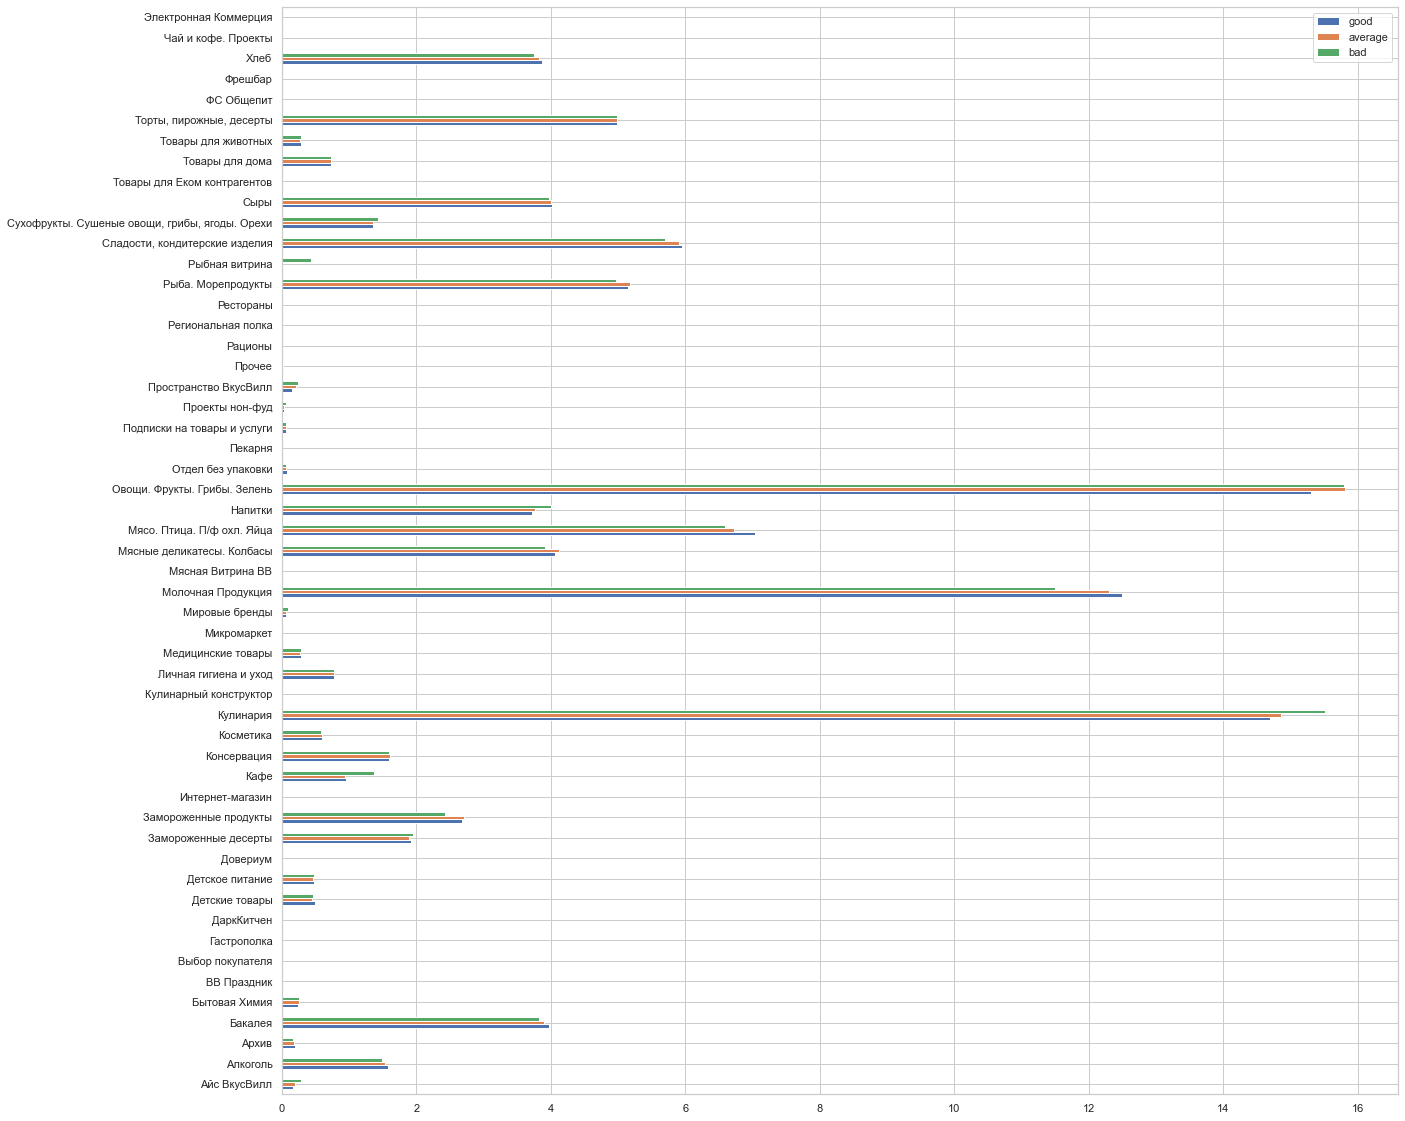

In [37]:
df_category_diff.plot(kind="barh",figsize=(20,20))

In [25]:
lis_ruba = df_checks_with_cat[df_checks_with_cat['name_gr'] == 'Рыбная витрина']['id_tt_cl'].unique()

In [29]:
df_ruba = pd.DataFrame(lis_ruba,columns = ['id_tt_cl'])

In [32]:
df_ruba2 = df_ruba.merge(df_shops['quality'], how='left', left_on='id_tt_cl', right_on='id_tt')

In [33]:
df_ruba2

,id_tt_cl,quality
0,14330,-3
1,14332,-3
2,15123,-3
3,15140,3
4,11712,3
5,14899,-3
6,13018,-3
7,11020,-3
8,15986,-3
9,11955,-3
